# Kinematic analysis of an four-bar elliptic exercising machine

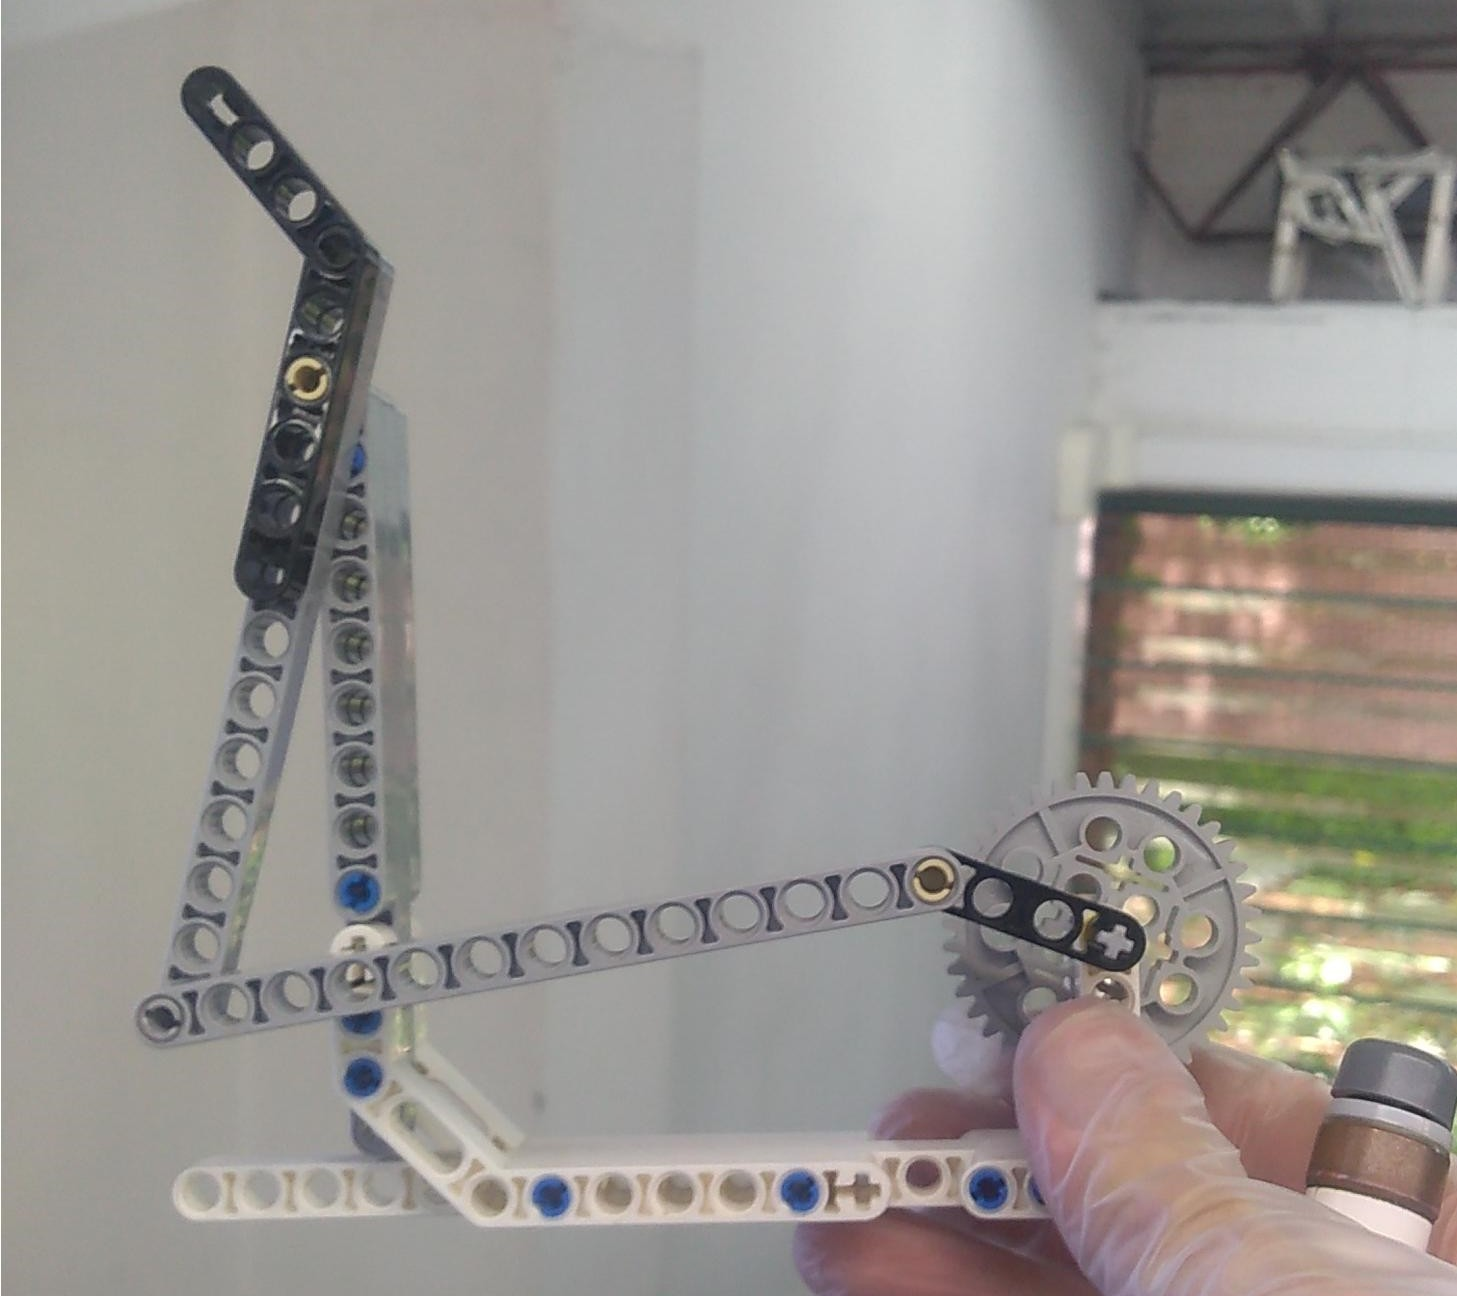

## Description
This mechanism was designed in (aqui pongo el año) by (...) (autor & otro, 2021). \[Recomendación para gestionar referencias y citas: Mendeley.

Para buscar información en las bases de datos de la UPB: https://bibliotecavirtual.upb.edu.co/\]

Shyu et. al. (2011) proposed a adjustable 2 degrees of freedom elliptical excercising machine that .....

More information about this mechanism can be found on Norton (2009).

\[otra forma de citar: \]... kinematic analysis of this mechanism has been done in the reviewed literature (Norton, 2009).

Another implementation of an elliptical machine (...)

## Kinematic analysis

![Diagrama Cinemático](img/ElipticaCinematicoDigital.png)

### Mobility (Degrees of Freedom)

$n = 4$, $f_1 = 4$, $f_2 = 0$

\begin{equation}
\label{eq:1}
F = 3(n-1)-2f_1-f_2
\end{equation}

given $n$, $f_1$ and $f_2$, the DOF of the studied mechanism are obtained from evaluating (1)

$F = 1$ (2).

### Parameters and variables

Parameters: $r_2,r_3,r_4,r_{1x},r_{1y}$

Main variables: $\theta_2$

Secondary variables: $\theta_3, \theta_4$

### Vector diagram

![Diagrama Vectorial](img/ElipticaVectorialDigital.png)

### Vector equations

$\overrightarrow{r_2}+\overrightarrow{r_3}-\overrightarrow{r_4}-\overrightarrow{r_{1y}}-\overrightarrow{r_{1x}} = 0$

### Scalar equations

$r_2\cdot cos(\theta_{2})+r_3\cdot cos(\theta_{3})-r_4\cdot cos(\theta_{4})-r_{1y}\cdot cos(90°)-r_{1x}\cdot cos(180°)=0$,

$r_2\cdot sin(\theta_{2})+r_3\cdot sin(\theta_{3})-r_4\cdot sin(\theta_{4})-r_{1y}\cdot sin(90°)-r_{1x}\cdot sin(180°)=0$

which, after reducing terms, yields


$r_2\cdot cos(\theta_{2})+r_3\cdot cos(\theta_{3})-r_4\cdot cos(\theta_{4})+r_{1x}=0$,

$r_2\cdot sin(\theta_{2})+r_3\cdot sin(\theta_{3})-r_4\cdot sin(\theta_{4})-r_{1y}=0$

### Initial Conditions Measurement

![CI](img/ElipticaMedicion.png)

Approximated values of $\theta_3$ and $\theta_4$ were measured for a specific position of link 2 (crank):

Variable|Value
:---:|:---:
$\theta_2$|**161.24°**
$\theta_3$|10.38°+180° = **190.38°**
$\theta_4$|76.95°+180° = **256.95°**

## Kinematic analysis - implementation

### Initialization

In [1]:
import numpy as np
from scipy.optimize import fsolve 
import matplotlib.pyplot as plt

### Function definition

In [2]:
def eliptica(condIni, params):
    #variable de entrada y parámetros
    ## Primero la variable de entrada
    th2 = params[0]
    ## Luego los parámetros
    r2 = params[1]
    r3 = params[2]
    r4 = params[3]
    r1x = params[4]
    r1y = params[5]
    
    #estos son arrays de Numpy
    th3 = condIni[0]
    th4 = condIni[1]
        
    return [r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1y*np.cos(np.pi/2) - r1x*np.cos(np.pi),
            r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1y*np.sin(np.pi/2) - r1x*np.sin(np.pi)]

### Function test

In [8]:
r2 = 3
r3 = 12
r4 = 10
r1x = 12
r1y = 9

th2 = np.deg2rad(161.24)

parametros = [th2,r2,r3,r4,r1x,r1y]

th3ini = np.deg2rad(190.38)
th4ini = np.deg2rad(256.95)

x0 = [th3ini,th4ini]

print(eliptica(x0,parametros))

[-0.38622245871843575, -0.455561574199043]


### Solution of non linear equations

In [4]:
q,info,exitflag,mensaje = fsolve(eliptica,
                                 x0,
                                 args = parametros,
                                 full_output = True)
print("solucion = ",np.rad2deg(q),"\n",exitflag,"\n",mensaje)
th3 = q[0]
th4 = q[1]

solucion =  [187.91942241 254.30817035] 
 1 
 The solution converged.


### Point definition for mechanism graphic representation

![Puntos](img/ElipticaPuntosDigital.png)

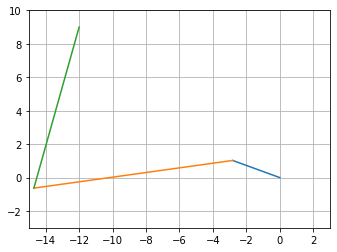

In [6]:
pOx = 0
pOy = 0
pAx = r2*np.cos(th2)
pAy = r2*np.sin(th2)
pBx = pAx + r3*np.cos(th3)
pBy = pAy + r3*np.sin(th3)
pCx = pBx - r4*np.cos(th4)
pCy = pBy - r4*np.sin(th4)

fig = plt.figure()
hr2 = plt.plot([pOx,pAx],[pOy,pAy])
hr3 = plt.plot([pBx,pAx],[pBy,pAy])
hr4 = plt.plot([pCx,pBx],[pCy,pBy])
plt.axis("scaled")
plt.xlim(-r2-r3,r2)
plt.ylim(-r2,r4)
plt.grid()
plt.draw() 

### Solution for a range of values

As this mechanism incorporates a crank, a continuous range can be provided:

$\theta_2 : [0°,360°]$

#### Input variable range definition

In [9]:
numpos = 100
th2v = np.linspace(0,2*np.pi,numpos)

#### Solution arrays definition

In [10]:
th3v = np.zeros(numpos)
th4v = np.zeros(numpos)
exitflagV = np.zeros(numpos)

####  Solution for the defined range

In [11]:
for i,val in enumerate(th2v):
    parametros[0] = val
    q,info,exitflagV[i],mensaje = fsolve(eliptica,
                                        x0, 
                                        args = parametros,
                                        full_output = True)
    th3v[i] = q[0]
    th4v[i] = q[1]
    x0 = q
    if exitflagV[i] != 1:
        print('Error en la iteración ' + str(i))
        break

#### Maximum and Minimum values

In [15]:
[th3max,posth3max] = [np.rad2deg(np.max(th3v)),np.argmax(th3v)]
[th3min,posth3min] = [np.rad2deg(np.min(th3v)),np.argmin(th3v)]

[th4max,posth4max] = [np.rad2deg(np.max(th4v)),np.argmax(th4v)]
[th4min,posth4min] = [np.rad2deg(np.min(th4v)),np.argmin(th4v)]

print("th3 max",th3max)
print("th3 min",th3min)
print("th4 max",th4max)
print("th4 min",th4min)

th3 max 199.37402280203483
th3 min 170.39898818230927
th4 max 287.5528904951237
th4 min 252.60154764946392


## Graphs

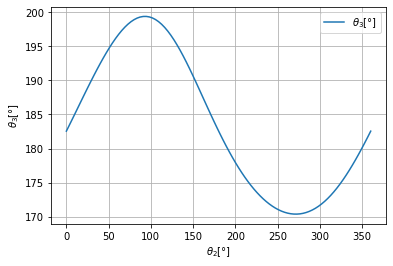

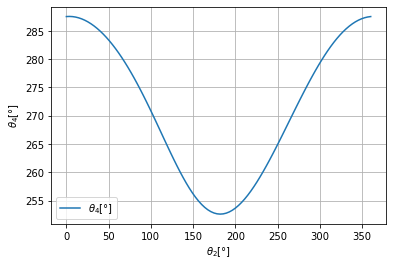

In [23]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.legend([r"$\theta_3[°]$"])
plt.xlabel(r"$\theta_2$[°]")
plt.ylabel(r"$\theta_3$[°]")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.legend([r"$\theta_4[°]$"])
plt.xlabel(r"$\theta_2$[°]")
plt.ylabel(r"$\theta_4$[°]")
plt.grid()

## Analysis

The elliptical machine's kinematics were analyzed. From the previous graphs, it is evident that the machine works as intended. Range of motion of each link is presented in the next table:

Variable|Range
:---:|:---:
$\theta_2$|0° - 360°
$\theta_3$|170.39° - 199.37°
$\theta_4$|252.6° - 287.55°

No issues were found in the analyzed range of the input variable.

# Animation

## Point Definition for motion range

In [28]:
pOx = 0
pOy = 0
pAx = r2*np.cos(th2v)
pAy = r2*np.sin(th2v)
pBx = pAx + r3*np.cos(th3v)
pBy = pAy + r3*np.sin(th3v)
pCx = -r1x
pCy = r1y

## Canvas setup

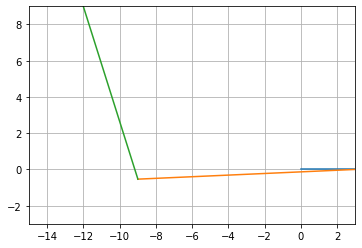

In [31]:
fig = plt.figure()
hr2 = plt.plot([pOx,pAx[0]],[pOy,pAy[0]])
hr3 = plt.plot([pBx[0],pAx[0]],[pBy[0],pAy[0]])
hr4 = plt.plot([pCx,pBx[0]],[pCy,pBy[0]])
plt.axis("scaled")
plt.xlim(-r2-r3,r2)
plt.ylim(-r2,r1y)
plt.grid()
plt.draw() 

## Function

In [18]:
def animar(i):
    manivelaX = np.array([pOx,pAx[i]])
    manivelaY = np.array([pOy,pAy[i]])
    acopladorX = np.array([pBx[i],pAx[i]])
    acopladorY = np.array([pBy[i],pAy[i]])
    balancinX = np.array([pCx,pBx[i]])
    balancinY = np.array([pCy,pBy[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hr4[0].set_xdata(balancinX)
    hr4[0].set_ydata(balancinY)
    
    return hr2[0],hr3[0],hr4[0]

## Animation parameters

In [34]:
from matplotlib.animation import FuncAnimation

videoLength = 5000 # en milisegundos
maxFrames = 80

increment = int(np.ceil(numpos/maxFrames))
totalFrames = range(0,numpos,increment)
animacion = FuncAnimation(fig, 
                          animar, 
                          frames = totalFrames,
                          interval=videoLength/len(totalFrames),
                          save_count=len(totalFrames),
                          blit=True)

## Display

In [35]:
#En Jupyter se pueden mostrar las animaciones directamente en el cuaderno
from IPython.display import HTML

# Comentar para reducir tamaño del cuaderno, generar animación en formato gif o mp4, requiere instalar ffmpeg
#animacion.save('animation.mp4', writer='ffmpeg', fps=15)
HTML(animacion.to_jshtml())

# References

autor, c., & otro, a. (2021). Libro de las elipticas. Medellín: UPB.

Norton, Robert L. 2009. Diseño de Maquinaria. 4th ed. McGraw-Hill Interamericana de España S.L.

Shyu, J. -., Chen, C. -., Yu, C. -., & Luo, Y. -. (2011). Research and development of an adjustable elliptical exerciser doi:10.4028/www.scientific.net/AMR.308-310.2078 Retrieved from www.scopus.com